Imports

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

Load csv file from Google drive

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
# link = 'https://drive.google.com/file/d/1muJgMGFGyfdXmuI2Zgn9wG_0OyCij1lr/view?usp=share_link'  # 35k
# link = 'https://drive.google.com/file/d/19p5HaPYQnSo0jwnNrAqghgKt8BS0fwAm/view?usp=share_link'  # 500k
# link = 'https://drive.google.com/file/d/1CF72Mm5zUgPugsa6U_N6hjm6sz0rVTAS/view?usp=share_link'  # 1M
# link = 'https://drive.google.com/file/d/1QhwQ1NDC3gTPNkO8gQJ4ieTaHrvrTPRk/view?usp=share_link'  # 1M with conf > 0.90
link = 'https://drive.google.com/file/d/137jUnisLP1acWR0NLyJXxMeDbq0tCDjk/view?usp=share_link'  # 1M with conf > 0.95

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('training_data.csv')

df_train = pd.read_csv('training_data.csv')

In [5]:
# df.hist(figsize=(30,30), bins=30)

df_train = df_train[df_train.SR_B2!=0]
print(len(df_train))

886454


In [6]:
df = df_train[['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7', 'NDVI', 'Lai', 'cropland']]

y = np.array(df['cropland'])
df = df.drop(['cropland'], axis=1)

Random forest classifier with 70-30 split

In [7]:
X = np.array(df)

X_train, X_cv, y_train, y_cv = model_selection.train_test_split(X, y, test_size=0.3)

clf = RandomForestClassifier(n_estimators=200, n_jobs=-1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_cv)

accuracy = clf.score(X_cv, y_cv)

accuracy

0.8618808213975491

Confusion matrix

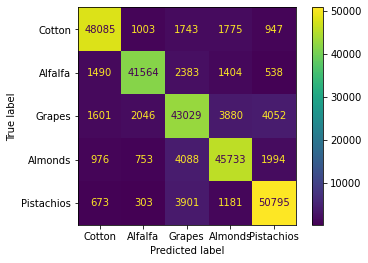

In [24]:
cm = confusion_matrix(y_cv, y_pred, labels=clf.classes_)
crop_labels = ['Cotton', 'Alfalfa', 'Grapes', 'Almonds', 'Pistachios']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=crop_labels)
disp.plot()

Class-wise precision and recall

In [25]:
print(classification_report(y_cv, y_pred, target_names=crop_labels))

              precision    recall  f1-score   support

      Cotton       0.91      0.90      0.90     53553
     Alfalfa       0.91      0.88      0.89     47379
      Grapes       0.78      0.79      0.78     54608
     Almonds       0.85      0.85      0.85     53544
  Pistachios       0.87      0.89      0.88     56853

    accuracy                           0.86    265937
   macro avg       0.86      0.86      0.86    265937
weighted avg       0.86      0.86      0.86    265937

